In [1]:
from ipynb.fs.full.prepare_data import *
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, ADASYN
import pickle
import time

Loading data...
Attempting to connect to the database
Connected!
Fetching query...
Fetched!
Loading data in dataframe
Data loaded into dataframe!
Class imbalance check for label: title
Counter({'stay_at_home': 46928, 'workplace_closure': 26044, 'contact_tracing': 15082, 'school_closure': 14812, 'restrictions_on_gatherings': 7130, 'intern_travel_control': 2356})
Started data transformation...
Started preprocessing...
Extracting labels and features...
Labels and features extracted!
Encoding categorical features...
Normalizing numerical features...
Preprocessing done!
Data transformation done! Data is ready for training.
Started feature selection...
Selecting top 8 features
Feature selection done!


__Oversample to account for minority classes__

In [2]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [3]:
model = RandomForestClassifier(criterion="gini")

__Train model__

In [4]:
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time 
print(f"Model construction: {duration} seconds")

Model construction: 10.073416471481323 seconds


In [5]:
from collections import Counter
Counter(y_train)

Counter({4: 37542, 5: 37542, 3: 37542, 0: 37542, 2: 37542, 1: 37542})

__Predict and get scores__

In [6]:
y_pred = model.predict(X_test)
recall = recall_score(y_pred, y_test, average = 'micro') * 100
precision = precision_score(y_pred, y_test, average = 'micro') * 100
print("Recall of Random Forest {:.2f} %".format(recall))
print("precision of Random Forest {:.2f} %".format(precision))

Recall of Random Forest 97.11 %
precision of Random Forest 97.11 %


In [7]:
accuracy_score(y_pred, y_test)

0.9711183302923768

__Get confusion matrix__

In [8]:
cm = confusion_matrix(y_test, y_pred)

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

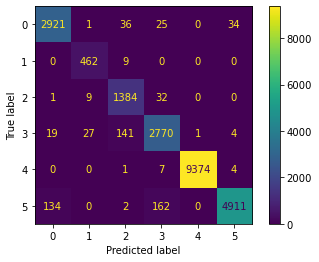

In [10]:
disp.plot()

__Get feature importance__

Feature: outbreak_related, Score: 0.00124
Feature: month_name, Score: 0.27114
Feature: is_holiday, Score: 0.00891
Feature: season, Score: 0.12310
Feature: is_weekend, Score: 0.00151
Feature: retail_and_recreation, Score: 0.31037
Feature: grocery_and_pharmacy, Score: 0.28364
Feature: num_unresolved, Score: 0.00009


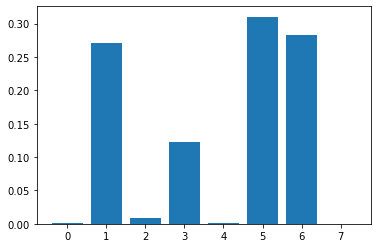

In [11]:
from matplotlib import pyplot
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    feature = feature_names[i]
    print('Feature: %s, Score: %.5f' % (feature,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [12]:
# pip install eli5
import eli5
eli5.show_weights(model)

Weight,Feature
0.3104 ± 0.0678,x5
0.2836 ± 0.0638,x6
0.2711 ± 0.0703,x1
0.1231 ± 0.1002,x3
0.0089 ± 0.0063,x2
0.0015 ± 0.0014,x4
0.0012 ± 0.0011,x0
0.0001 ± 0.0002,x7


In [13]:
eli5.show_prediction(model, X_train[1], feature_names = feature_names) 